# Cell 1: Imports, Load & Scale Data

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MiniBatchKMeans

# Loading dataset

In [ ]:

df = pd.read_csv('data.csv', parse_dates=['Timestamp'])


### Dimensionality Reduction with PCA

# Selecting features for clustering (weather + consumption data)

In [ ]:

features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'precipIntensity', 'demand']
X = df[features]

# Applying PCA

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Add PCA results to DataFrame
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Visualizing the PCA projection

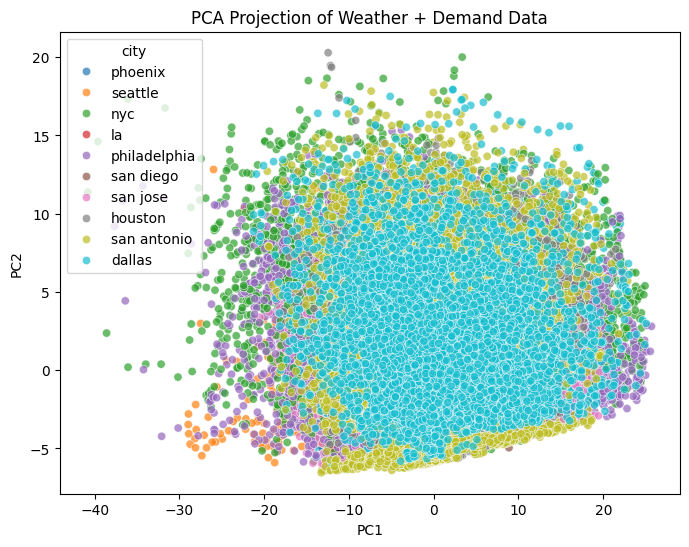

In [ ]:

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='city', alpha=0.7)
plt.title('PCA Projection of Weather + Demand Data')
plt.show()

### Clustering Algorithms

In [10]:
# Elbow Method to find optimal k
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Ploting the Elbow graph

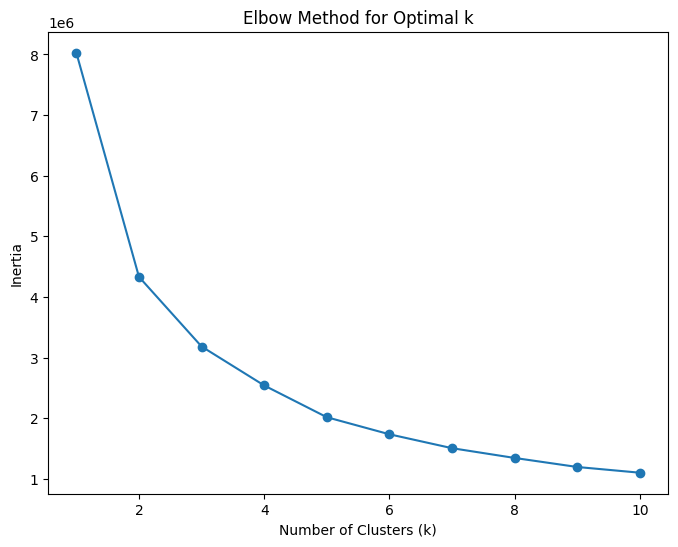

In [ ]:

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

### Fit K-Means and Visualize Clusters

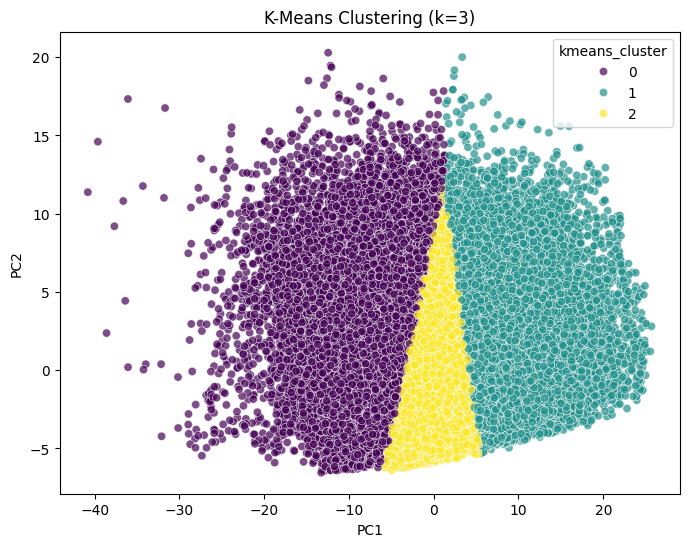

In [12]:
# Fit K-Means with the optimal k (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)

# Visualize the K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='kmeans_cluster', palette='viridis', alpha=0.7)
plt.title('K-Means Clustering (k=3)')
plt.show()


### DBSCAN Clusternig

In [13]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)


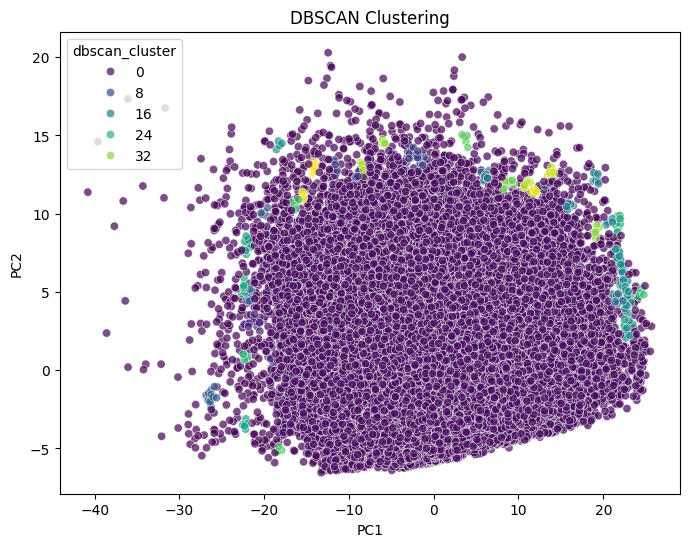

In [14]:
# Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='dbscan_cluster', palette='viridis', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.show()

# Selecting features for clustering

In [ ]:

features = ['temperature', 'humidity', 'windSpeed', 'pressure', 'precipIntensity', 'demand']
X = df[features]

# Applying MiniBatchKMeans

In [ ]:

minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)
df['minibatch_kmeans_cluster'] = minibatch_kmeans.fit_predict(X)

# PCA  visualization (reduce to 2 dimensions)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

# Ploting the clusters

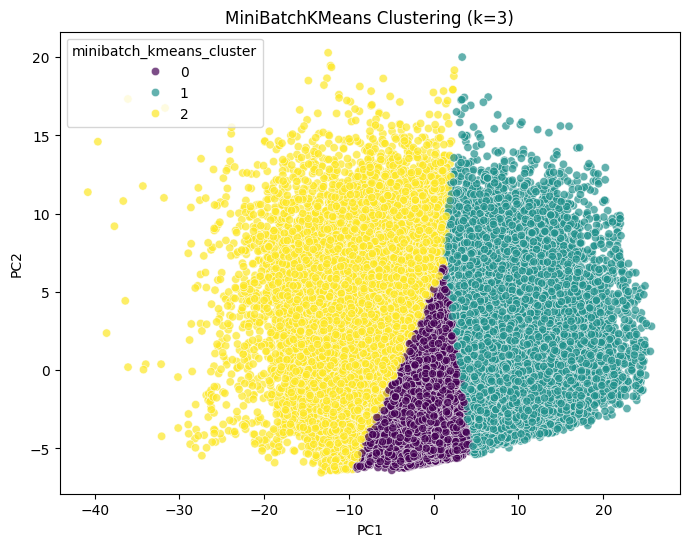

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='minibatch_kmeans_cluster', palette='viridis', alpha=0.7)
plt.title('MiniBatchKMeans Clustering (k=3)')
plt.show()

### Evaluating the Clustering Performance

In [26]:
# Evaluate the clustering performance using silhouette score
sil_score = silhouette_score(X, df['minibatch_kmeans_cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.35127446680561236


In [27]:
# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (K-Means):\n", cluster_centers)


Cluster Centers (K-Means):
 [[6.03860918e-01 6.32696147e-01 7.94212476e+00 1.00971584e+03
  7.53697773e-03 8.44724536e-02]
 [4.31403714e-01 6.40322183e-01 5.96311547e+00 1.02485933e+03
  2.01945696e-03 7.66950821e-02]
 [5.53537091e-01 6.73122340e-01 4.67587461e+00 1.01604951e+03
  2.73487906e-03 8.41406087e-02]]
